## Exercise 1 - Decision Trees

Michael Molnar 

100806823

<b> Business Problem Description:</b>

Given a number of datapoints present in a credit card application, how can we use decision trees to predict if the applicant will be approved or rejected?

<b> Data Source:</b> 

Australian Credit Approval

http://archive.ics.uci.edu/ml/datasets/statlog+(australian+credit+approval)

Data file: australian.dat

<b> Dataset Disclaimer: </b>

All attribute names and values have been changed to meaningless symbols to protect confidentiality of the data.

### Data Acquisition and Formatting 

In [223]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [224]:
# Import the dataset into a Panda's dataframe
# Note that the given dataset does not contain a header row, so we will add one
ccdataset = pd.read_csv('australian.dat', sep = ' ', names=['A1','A2', 'A3', 'A4', 'A5', 'A6',
                    'A7', 'A8', 'A9', 'A10', 'A11', 'A12', 'A13', 'A14', 'A15'])

In [225]:
display(ccdataset)

A1     A2      A3  A4  A5  A6     A7  A8  A9  A10  A11  A12  A13   A14  \
0     1  22.08  11.460   2   4   4  1.585   0   0    0    1    2  100  1213   
1     0  22.67   7.000   2   8   4  0.165   0   0    0    0    2  160     1   
2     0  29.58   1.750   1   4   4  1.250   0   0    0    1    2  280     1   
3     0  21.67  11.500   1   5   3  0.000   1   1   11    1    2    0     1   
4     1  20.17   8.170   2   6   4  1.960   1   1   14    0    2   60   159   
..   ..    ...     ...  ..  ..  ..    ...  ..  ..  ...  ...  ...  ...   ...   
685   1  31.57  10.500   2  14   4  6.500   1   0    0    0    2    0     1   
686   1  20.67   0.415   2   8   4  0.125   0   0    0    0    2    0    45   
687   0  18.83   9.540   2   6   4  0.085   1   0    0    0    2  100     1   
688   0  27.42  14.500   2  14   8  3.085   1   1    1    0    2  120    12   
689   1  41.00   0.040   2  10   4  0.040   0   1    1    0    1  560     1   

     A15  
0      0  
1      0  
2      0  
3      1  
4      1  
..   ...  
685    1  
686    0  
687    1  
688    1  
689    1  

[690 rows x 15 columns]

In [226]:
ccdataset.shape

(690, 15)

<b> Observations: </b>
- The dataset contains 690 rows and 15 columns.

We are provided with a Word document with the following information relating to the columns:
- A1: categorical - values: 0, 1
- A2: continuous 
- A3: continuous 
- A4: categorical - 1, 2, 3
- A5: categorical - 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14
- A6: categorical - 1, 2, 3, 4, 5, 6, 7, 8, 9
- A7: continuous 
- A8: categorical - 1, 0
- A9: categorical - 1, 0
- A10: continous
- A11: categorical - 1, 0
- A12: categorical - 1, 2, 3
- A13: continuous 
- A14: continuous
- A15: class attribute - 1 (approved), 0 (rejected)

For ease of reference we will change the label names - categorical values will be given C's and numerical values will be given N's.

A15 is the class we are trying to predict, so we rename it "target"

In [227]:
ccdataset.rename(columns={'A1': 'C1', 'A2': 'N1', 'A3': 'N2', 'A4': 'C2', 'A5': 'C3', 'A6': 'C4', 'A7': 'N3', 'A8': 'C5',
                       'A9': 'C6', 'A10': 'N4', 'A11': 'C7', 'A12': 'C8', 'A13': 'N5', 'A14': 'N6', 
                        'A15': 'target'}, inplace=True)

### EDA:  Exploratory Data Analysis

In [228]:
ccdataset.describe()

C1          N1          N2          C2          C3          C4  \
count  690.000000  690.000000  690.000000  690.000000  690.000000  690.000000   
mean     0.678261   31.568203    4.758725    1.766667    7.372464    4.692754   
std      0.467482   11.853273    4.978163    0.430063    3.683265    1.992316   
min      0.000000   13.750000    0.000000    1.000000    1.000000    1.000000   
25%      0.000000   22.670000    1.000000    2.000000    4.000000    4.000000   
50%      1.000000   28.625000    2.750000    2.000000    8.000000    4.000000   
75%      1.000000   37.707500    7.207500    2.000000   10.000000    5.000000   
max      1.000000   80.250000   28.000000    3.000000   14.000000    9.000000   

               N3          C5          C6         N4          C7          C8  \
count  690.000000  690.000000  690.000000  690.00000  690.000000  690.000000   
mean     2.223406    0.523188    0.427536    2.40000    0.457971    1.928986   
std      3.346513    0.499824    0.495080    4.86294    0.498592    0.298813   
min      0.000000    0.000000    0.000000    0.00000    0.000000    1.000000   
25%      0.165000    0.000000    0.000000    0.00000    0.000000    2.000000   
50%      1.000000    1.000000    0.000000    0.00000    0.000000    2.000000   
75%      2.625000    1.000000    1.000000    3.00000    1.000000    2.000000   
max     28.500000    1.000000    1.000000   67.00000    1.000000    3.000000   

                N5             N6      target  
count   690.000000     690.000000  690.000000  
mean    184.014493    1018.385507    0.444928  
std     172.159274    5210.102598    0.497318  
min       0.000000       1.000000    0.000000  
25%      80.000000       1.000000    0.000000  
50%     160.000000       6.000000    0.000000  
75%     272.000000     396.500000    1.000000  
max    2000.000000  100001.000000    1.000000

In [229]:
# Check for any duplciated rows
duplicated_rows_df = ccdataset[ccdataset.duplicated()]
print("Duplicated Rows:")
print(duplicated_rows_df)

Duplicated Rows:
Empty DataFrame
Columns: [C1, N1, N2, C2, C3, C4, N3, C5, C6, N4, C7, C8, N5, N6, target]
Index: []


In [230]:
# Check for any missing values
ccdataset.isna().sum()

C1        0
N1        0
N2        0
C2        0
C3        0
C4        0
N3        0
C5        0
C6        0
N4        0
C7        0
C8        0
N5        0
N6        0
target    0
dtype: int64

<b> Observations: </b>
- We have no duplicated rows and no missing values.

<b> Analyzing Target (Dependent Variable): </b>

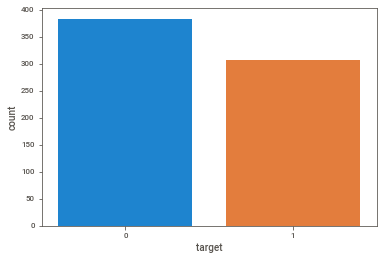

In [231]:
ax = sns.countplot(x="target", data=ccdataset)

In [232]:
ccdataset['target'].value_counts()

0    383
1    307
Name: target, dtype: int64

<b> Observations: </b>
- Out of our 690 applications, we have 383 in which the applicant was denied and 307 in which they were approved.

<b> Analyzing Numerical Independent Variables: </b>

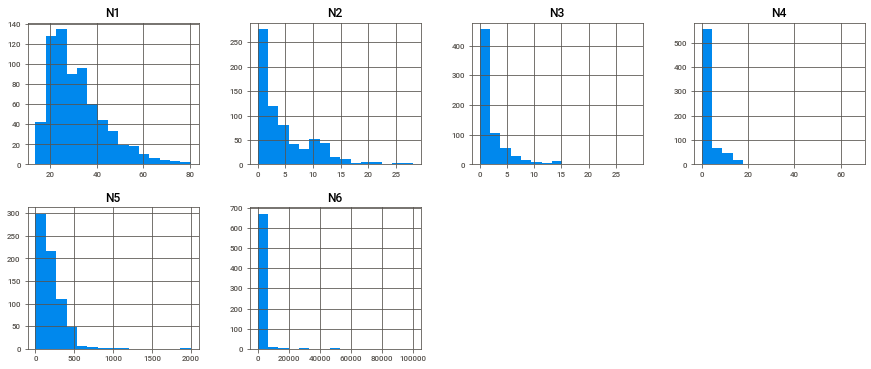

In [233]:
# Create a list of columns containing the numerical features
# Plot a histogram of each feature to see the distributions
numerical = ['N1', 'N2', 'N3', 'N4', 'N5', 'N6']
ccdataset[numerical].hist(bins=15, figsize=(15, 6), layout=(2, 4));

<b> Observations: </b>
- All distributions are right skewed 
- The ranges of the different distributions are quite varied - we will standardize the values before using the decision tree models on the data

In [234]:
# Next, plot histograms for each of the numerical features and the targets 
import plotly.graph_objects as go

fig_hist = []
for i, feature_name in enumerate(ccdataset[numerical]):
    fig_hist.append(go.Figure())
    for label in [0,1]:
        fig_hist[i].add_trace(go.Histogram(x=ccdataset[ccdataset["target"]==label][feature_name], name=label))
    fig_hist[i].update_layout(height=400, width=800, title_text=feature_name)
    fig_hist[i].update_layout(barmode='overlay')
    fig_hist[i].update_traces(opacity=0.5)
    fig_hist[i].show()

In [235]:
import sweetviz as sv
ccdataset_report = sv.analyze(ccdataset)

:FEATURES DONE:                    |█████████████████████| [100%]   00:03  -> (00:00 left)
:PAIRWISE DONE:                    |█████████████████████| [100%]   00:00  -> (00:00 left)


Creating Associations graph... DONE!


In [236]:
ccdataset_report.show_html()

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: no browser will pop up, the report is saved in your notebook/colab files.


<b> Analyzing Relationships Between Numerical Variables and Target: </b>

In [237]:
numdata = ccdataset[['N1', 'N2', 'N3', 'N4', 'N5', 'N6', 'target']]
numdata.corr().style.background_gradient(cmap='coolwarm')

<b> Observations: </b>
- N3 and N4 have the strongest correlation with the target, while N5 has the weakest

<b> Analyzing Relationships Between Numerical Variables: </b>

In [238]:
fig_scatmat = go.Figure(data=go.Splom(
                        dimensions=[dict(label=feature, values=ccdataset[feature]) \
                                    for feature in numerical], \
                        text=ccdataset['target'],
                        marker=dict(showscale=False, line_color='white', line_width=0.5)))

fig_scatmat.update_layout(title='Pairwise feature scatter plots')

fig_scatmat.show()

<b> Observations: </b>
- (Feature Selection) 
- All numerical features are important and independent.
- (Some Insights)
- For N3 and N4, a low value is mostly a rejection and a higher value is mostly an approval 
- For N5, low values are mostly approvals while middle range values are mostly rejections
- For N6, values very close to zero are rejections and higher values are approvals

<b> Analyzing Categorical Independent Variables: </b>

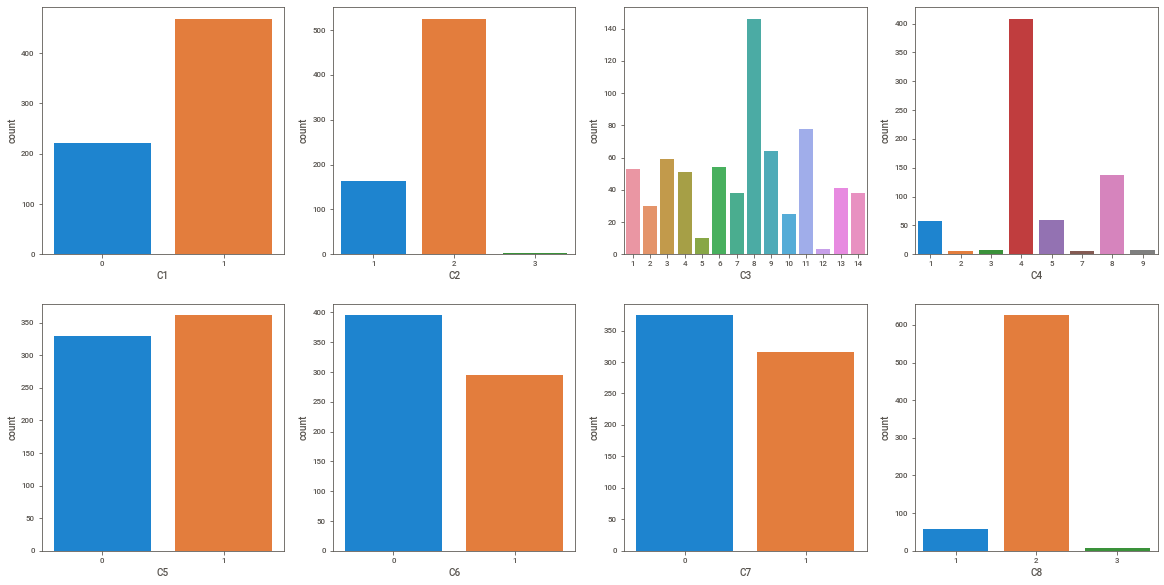

In [239]:
import seaborn as sns
%matplotlib inline

# Create a list of the columns of categorical features and plot a countplot of each
categorical = ['C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8']

fig, ax = plt.subplots(2, 4, figsize=(20, 10))
for variable, subplot in zip(categorical, ax.flatten()):
    sns.countplot(ccdataset[variable], ax=subplot)

<b> Observations: </b>
- C5, C6, and C7 have relatively even splits between values 0 and 1
- C1, C2, C3, C4, and C8 have clear most commonly occurring values

For each categorical feature we will show the distribution in relation to the target.

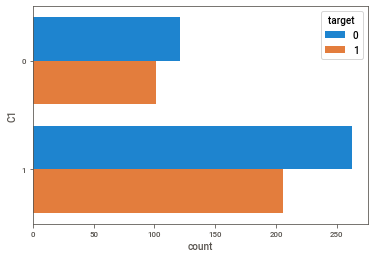

In [240]:
sns.countplot(y='C1', hue='target', data=ccdataset)

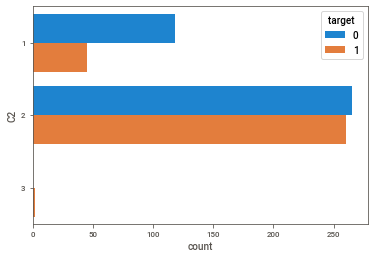

In [241]:
sns.countplot(y='C2', hue='target', data=ccdataset)

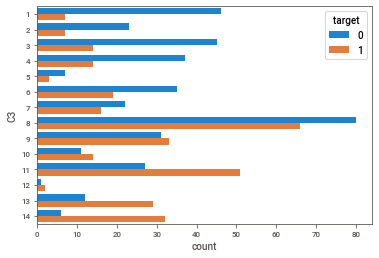

In [242]:
sns.countplot(y='C3', hue='target', data=ccdataset)

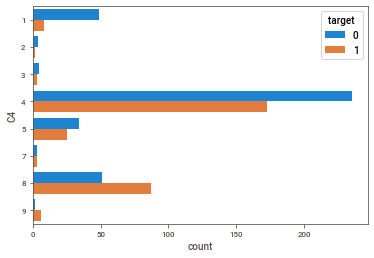

In [243]:
sns.countplot(y='C4', hue='target', data=ccdataset)

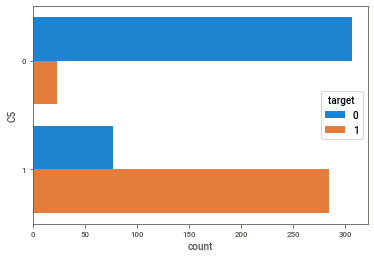

In [244]:
sns.countplot(y='C5', hue='target', data=ccdataset)

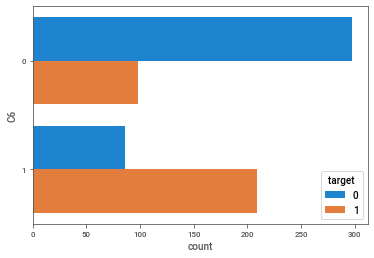

In [245]:
sns.countplot(y='C6', hue='target', data=ccdataset)

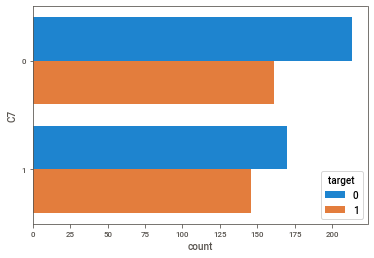

In [246]:
sns.countplot(y='C7', hue='target', data=ccdataset)

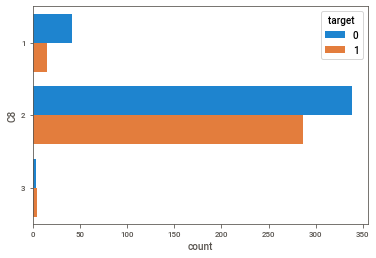

In [247]:
sns.countplot(y='C8', hue='target', data=ccdataset)

<b> Observations: </b>
- C1, C7, C8 - relatively even splits between approval and rejection based on their values
- C2 - a value of one is mostly rejection, but a value of two is split 
- C3 - mostly rejections for values one through eight, and mostly approvals for values eleven through fourteen
- C4 - more often a rejection except for the higher values
- C5 and C6 - zero is mostly rejection and one is mostly approval 

In [248]:
ccdataset.corr().style.background_gradient(cmap='coolwarm')

<b> Observations: </b>
- Based on the observations above and this correlation matrix, we see that C5 and C6 are the most correlated features with the target
- C3 and N4 are the next strongest 
- C1, C7, and N5 have the weakest correlation 

### Splitting of Dataset and Standardization

In [249]:
# Extract all feature data and assign it to X
# Assign the target data to y
X = pd.DataFrame(ccdataset.drop(columns='target'))
y = pd.DataFrame(ccdataset['target'])

In [250]:
X

C1     N1      N2  C2  C3  C4     N3  C5  C6  N4  C7  C8   N5    N6
0     1  22.08  11.460   2   4   4  1.585   0   0   0   1   2  100  1213
1     0  22.67   7.000   2   8   4  0.165   0   0   0   0   2  160     1
2     0  29.58   1.750   1   4   4  1.250   0   0   0   1   2  280     1
3     0  21.67  11.500   1   5   3  0.000   1   1  11   1   2    0     1
4     1  20.17   8.170   2   6   4  1.960   1   1  14   0   2   60   159
..   ..    ...     ...  ..  ..  ..    ...  ..  ..  ..  ..  ..  ...   ...
685   1  31.57  10.500   2  14   4  6.500   1   0   0   0   2    0     1
686   1  20.67   0.415   2   8   4  0.125   0   0   0   0   2    0    45
687   0  18.83   9.540   2   6   4  0.085   1   0   0   0   2  100     1
688   0  27.42  14.500   2  14   8  3.085   1   1   1   0   2  120    12
689   1  41.00   0.040   2  10   4  0.040   0   1   1   0   1  560     1

[690 rows x 14 columns]

In [251]:
y

target
0         0
1         0
2         0
3         1
4         1
..      ...
685       1
686       0
687       1
688       1
689       1

[690 rows x 1 columns]

<b> Standardization of Numerical Values:</b>

In [252]:
X.describe()

C1          N1          N2          C2          C3          C4  \
count  690.000000  690.000000  690.000000  690.000000  690.000000  690.000000   
mean     0.678261   31.568203    4.758725    1.766667    7.372464    4.692754   
std      0.467482   11.853273    4.978163    0.430063    3.683265    1.992316   
min      0.000000   13.750000    0.000000    1.000000    1.000000    1.000000   
25%      0.000000   22.670000    1.000000    2.000000    4.000000    4.000000   
50%      1.000000   28.625000    2.750000    2.000000    8.000000    4.000000   
75%      1.000000   37.707500    7.207500    2.000000   10.000000    5.000000   
max      1.000000   80.250000   28.000000    3.000000   14.000000    9.000000   

               N3          C5          C6         N4          C7          C8  \
count  690.000000  690.000000  690.000000  690.00000  690.000000  690.000000   
mean     2.223406    0.523188    0.427536    2.40000    0.457971    1.928986   
std      3.346513    0.499824    0.495080    4.86294    0.498592    0.298813   
min      0.000000    0.000000    0.000000    0.00000    0.000000    1.000000   
25%      0.165000    0.000000    0.000000    0.00000    0.000000    2.000000   
50%      1.000000    1.000000    0.000000    0.00000    0.000000    2.000000   
75%      2.625000    1.000000    1.000000    3.00000    1.000000    2.000000   
max     28.500000    1.000000    1.000000   67.00000    1.000000    3.000000   

                N5             N6  
count   690.000000     690.000000  
mean    184.014493    1018.385507  
std     172.159274    5210.102598  
min       0.000000       1.000000  
25%      80.000000       1.000000  
50%     160.000000       6.000000  
75%     272.000000     396.500000  
max    2000.000000  100001.000000

<b> Observations: </b>
- We see that N1 ranges from about 14 to 80, N2 from 0 to 28, N3 from 0 to 28, N4 from 0 to 67, N5 from 0 to 2,000, and N6 from 1 to 100,001
- We will standardize these values before working with the classification algorithsm

In [253]:
from sklearn.preprocessing import StandardScaler 

numerical = ['N1', 'N2', 'N3', 'N4', 'N5', 'N6']

ss = StandardScaler()
X[numerical] = pd.DataFrame(ss.fit_transform(X[numerical]), columns=[numerical])

In [254]:
X

C1        N1        N2  C2  C3  C4        N3  C5  C6        N4  C7  C8  \
0     1 -0.801052  1.347111   2   4   4 -0.190906   0   0 -0.493887   1   2   
1     0 -0.751240  0.450548   2   8   4 -0.615536   0   0 -0.493887   0   2   
2     0 -0.167856 -0.604823   1   4   4 -0.291083   0   0 -0.493887   1   2   
3     0 -0.835667  1.355152   1   5   3 -0.664877   1   1  1.769760   1   2   
4     1 -0.962306  0.685745   2   6   4 -0.078768   1   1  2.387119   0   2   
..   ..       ...       ...  ..  ..  ..       ...  ..  ..       ...  ..  ..   
685   1  0.000152  1.154129   2  14   4  1.278852   1   0 -0.493887   0   2   
686   1 -0.920093 -0.873189   2   8   4 -0.627497   0   0 -0.493887   0   2   
687   0 -1.075437  0.961146   2   6   4 -0.639459   1   0 -0.493887   0   2   
688   0 -0.350217  1.958221   2  14   8  0.257647   1   1 -0.288101   0   2   
689   1  0.796290 -0.948572   2  10   4 -0.652915   0   1 -0.288101   0   1   

           N5        N6  
0   -0.488358  0.037380  
1   -0.139591 -0.195413  
2    0.557943 -0.195413  
3   -1.069637 -0.195413  
4   -0.720870 -0.165066  
..        ...       ...  
685 -1.069637 -0.195413  
686 -1.069637 -0.186962  
687 -0.488358 -0.195413  
688 -0.372103 -0.193301  
689  2.185524 -0.195413  

[690 rows x 14 columns]

<b> Splitting the dataset into train and test sets: </b>

In [255]:
# We will use 70% for training data and 30% for testing data
from sklearn.model_selection import train_test_split
(X_train, X_test, y_train, y_test) = train_test_split(X, y, train_size=0.7, random_state=1)

In [256]:
X_train.shape

(482, 14)

In [257]:
y_train.shape

(482, 1)

In [258]:
X_test.shape

(208, 14)

In [259]:
y_test.shape

(208, 1)

### Creating a Decision Tree Classifier

In [260]:
from sklearn.tree import DecisionTreeClassifier

In [261]:
# Defining and fitting a DecisionTreeClassifier instance with the training data
tree1 = DecisionTreeClassifier()
tree1.fit(X_train,y_train)

DecisionTreeClassifier()

### Defining a Metric

For accuracy measurement we will use F1 Score.  

The F1 score can be interpreted as a weighted average of the precision and recall, where an F1 score reaches its best value at 1 and worst score at 0. The relative contribution of precision and recall to the F1 score are equal. 
(source: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html)

<b> Measuring accuracy on the training data: </b>

In [262]:
from sklearn.metrics import f1_score
tree1_pred_train = tree1.predict(X_train)
f1_score(y_train, tree1_pred_train)

1.0

<b> Use the model on the testing data and measure accuracy: </b>

In [272]:
tree1_pred_test = tree1.predict(X_test)
f1_score(y_test, tree1_pred_test)

0.7558139534883721

We achieve an F1 score of 1.0 on the training data and 0.756 on the testing data.

We can computer the confusion matrix:

In [264]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, tree1_pred_test)
cm

array([[101,  15],
       [ 27,  65]], dtype=int64)

<b> Observations: </b>
- The model incorrectly predicted the targets for 42 of the 208 rows in the test dataset

Next we can vizualization this decision tree.

In [265]:
from sklearn.tree import plot_tree

In [266]:
plt.figure(figsize=(180,180))
plot_tree(tree1, filled=True)
plt.show()

<b> Observations: </b>
- We see that the tree is very large 
- We are likely overfitting the training data and not generalizing well to the unseen testing data

### Tune the Decision Tree

In [267]:
# We set criterion to entropy and max_depth to 3
# We fit this decision tree on the training data
tree2 = DecisionTreeClassifier(criterion='entropy', max_depth=3)
tree2.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [268]:
# Measure the accuracy on the training data using F1 Score
tree2_pred_train = tree2.predict(X_train)
f1_score(y_train, tree2_pred_train)

0.8528784648187633

In [269]:
# Measure the accuracy on the testing data using F1 Score
tree2_pred_test = tree2.predict(X_test)
f1_score(y_test, tree2_pred_test)

0.8442211055276382

<b> Observations: </b>
- This decision tree performed worse on the training data but better on the testing data than the first did
- We have an F1 Score of 0.844 for the testing data, up from the previous 0.756

We again create the confusion matrix:

In [270]:
cm2 = confusion_matrix(y_test, tree2_pred_test)
cm2

array([[93, 23],
       [ 8, 84]], dtype=int64)

Here we have now 31 incorrect labels.

Visualizing the decision tree:

In [271]:
plt.figure(figsize=(180,180))
plot_tree(tree2, filled=True)
plt.show()

<b> Observations: </b>
- The first decision is if X[7] is less than or equal to 0.5
- X[7] is the column C5, which we had previously identified as the most correlated with the target
- This one classification splits the dataset almost in half 

We can examine the importance that this decision tree used for each of the features:

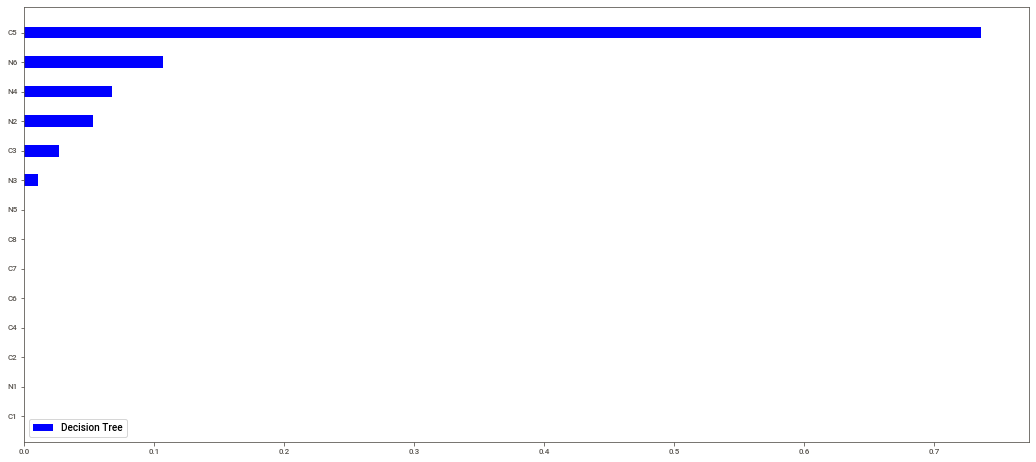

In [273]:
feature_importance=pd.DataFrame(
    {'dt' :tree2.feature_importances_},
    index = ccdataset.drop(columns=['target']).columns)

feature_importance.sort_values(by='dt',ascending=True,inplace=True)

index = np.arange(len(feature_importance))

fig, ax = plt.subplots(figsize=(18,8))
dt_feature=ax.barh(index+0.4,feature_importance['dt'],0.4,color='blue',label='Decision Tree')
ax.set(yticks=index+0.4,yticklabels=feature_importance.index)

ax.legend()
plt.show()

<b> Observations: </b>
- C5 is far and away the most important feature to the decision tree

### Compare with the Random Forest Classifier

In [274]:
# Building a Random Forest Classifier and training on the training data
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train.values.ravel())

RandomForestClassifier()

In [275]:
# Evaluating on Training set using F1 Test
rfc_pred_train = rfc.predict(X_train)
f1_score(y_train,rfc_pred_train)

1.0

In [276]:
# Evaluating on Test set
rfc_pred_test = rfc.predict(X_test)
f1_score(y_test,rfc_pred_test)

0.8114285714285713

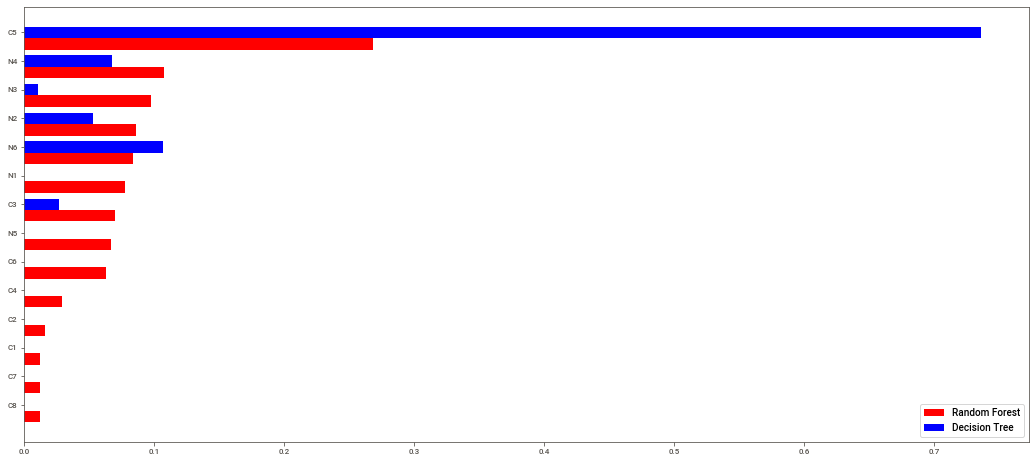

In [277]:
feature_importance=pd.DataFrame(
    {
    'rfc':rfc.feature_importances_,
    'dt':tree2.feature_importances_},
    index = ccdataset.drop(columns=['target']).columns)

feature_importance.sort_values(by='rfc',ascending=True,inplace=True)

index = np.arange(len(feature_importance))

fig, ax = plt.subplots(figsize=(18,8))
rfc_feature=ax.barh(index,feature_importance['rfc'],0.4,color='red',label='Random Forest')
dt_feature=ax.barh(index+0.4,feature_importance['dt'],0.4,color='blue',label='Decision Tree')
ax.set(yticks=index+0.4,yticklabels=feature_importance.index)

ax.legend()
plt.show()

<b> Observations: </b>
- The random forest also places the most importance on C5, but doesn't rely on it nearly as highly as the decision tree does